In [1]:
# imorting neccessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# reading the data
media_dataframe = pd.read_csv(r'mediacompany.csv')

In [3]:
# analyzing the dataframe
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# analyzing the shape of the dataframe
media_dataframe.shape

(80, 8)

In [5]:
# analyzing he info of the dataframe
media_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [6]:
# analyzing the describe of the dataframe
media_dataframe.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [7]:
media_dataframe.drop('Unnamed: 7', axis = 1, inplace = True)

In [8]:
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [9]:
# modifying the Date column
media_dataframe['Date'] = pd.to_datetime(media_dataframe['Date'])

In [10]:
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [11]:
media_dataframe

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0
...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0


In [12]:
# creating days columns to describe the nth day of a show
media_dataframe['days'] = [i for i in range(1,81)]

In [13]:
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


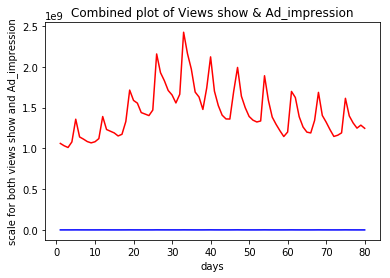

In [14]:
# plotting the days vs. views_show
# to check whethere is there is any decline in viewers in show as days passes
plt.figure()
plt.plot(media_dataframe['days'], media_dataframe['Views_show'], color = 'blue')
plt.plot(media_dataframe['days'], media_dataframe['Ad_impression'], color = 'red')
plt.xlabel('days')
plt.ylabel('scale for both views show and Ad_impression')
plt.title('Combined plot of Views show & Ad_impression')
plt.show()

Hence from the above plot you can see that there are gradual increase in views in between 30th day and 50-60th days in between. Thereafter there is gradual decrease in views.

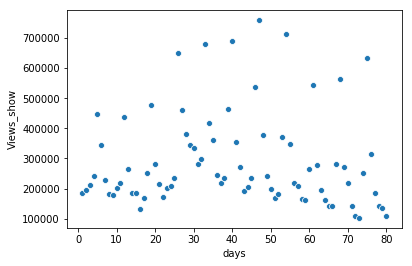

In [15]:
# plotting the same using scatter plot
sns.scatterplot(data = media_dataframe, x = 'days', y = 'Views_show')

In [16]:
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [17]:
# adding weekday column

# creating a function to represent weekday
def weekday(x):
    import datetime
    x = str(x)
    x_list = x.split('-')
    year = int(x_list[0])
    month = int(x_list[1])
    day = int(x_list[2])
    arg = datetime.date(year,month,day)
    return arg.strftime('%A')

In [18]:
# creating another column whihc date in string
media_dataframe['date_string'] = media_dataframe['Date']
media_dataframe['date_string'] = media_dataframe['date_string'].apply(lambda x: str(x))
media_dataframe['date_string'] = media_dataframe['date_string'].apply(lambda x: x[:10])

In [19]:
# creating weekday column
media_dataframe['weekday'] = media_dataframe['date_string'].apply(lambda x: weekday(x))

In [20]:
# creating function to define weekday numbers
def weekday_num(x):
    if x == 'Sunday':
        out = 1
    elif x == 'Monday':
        out = 2
    elif x == 'Tuesday':
        out = 3
    elif x == 'Wednesday':
        out = 4
    elif x == 'Thursday':
        out = 5
    elif x == 'Friday':
        out = 6
    else:
        out = 7
    return out

In [21]:
# creating another columns which represents weekday_number
media_dataframe['weekday_number'] = media_dataframe['weekday'].apply(lambda x: weekday_num(x))

In [22]:
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,date_string,weekday,weekday_number
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2017-03-01,Wednesday,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,2017-03-02,Thursday,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,2017-03-03,Friday,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,2017-03-04,Saturday,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,2017-03-05,Sunday,1


In [23]:
# creating another columns which represents weekends
# 1 for weekends and 0 for weekday
media_dataframe['weekend'] = media_dataframe['weekday_number'].apply(lambda x: 0 if x in [2,3,4,5,6] else 1)

In [24]:
# dropping date_string column
media_dataframe.drop('date_string', axis = 1, inplace = True)

In [25]:
# checking the dataframe
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekday_number,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,Wednesday,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,Thursday,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,Friday,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,Saturday,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,Sunday,1,1


#### Creating 1st model using visitors and weekday

In [26]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekday_number']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_1 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_1 = mlr_model_1.fit()

# checking the summary statistics of the model
mlr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           8.01e-12
Time:                        21:37:57   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors           0.2787      0.057      4.911      0.000       0.166       0.392
weekday_number -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary statistics we can that coefficient of weekday_number is negative although the coefficient is significant. So better we remove it and check with weekend predictor.

### Creating  mlr_model_2

In [27]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekend']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_2 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_2 = mlr_model_2.fit()

# checking the summary statistics of the model
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.51e-12
Time:                        21:37:58   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above statistice we can see that there has been increase in 2% of R-square value and also the coefficient of weekend is significant and as of now have high relation with the response variable. Also F-statistics and p value of F-statistics are significant. Hence the overall model is significant.

### Creating mlr_model_3

In [28]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekend', 'Character_A']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_3 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_3 = mlr_model_3.fit()

# checking the summary statistics of the model
mlr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        21:37:58   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above statistics we can see that there has been significant 8% raise in R-square value and also the coefficient of Character_A is extremely high which implies as of now it has very strong relation with response variable. Also the overall model is significant and the indiviual p values of the coefficients also significant.

In [29]:
# creating a list of Views_show
views_show_list = [x for x in media_dataframe['Views_show']]

In [30]:
views_show_list.pop()

108961

In [31]:
views_show_list.insert(0,0)

In [32]:
# creating lag_views column
media_dataframe['lag_views'] = views_show_list

In [33]:
# checking the dataframe
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekday_number,weekend,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,Wednesday,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,Thursday,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,Friday,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,Saturday,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,Sunday,1,1,240061


### Creating mlr_model_4

In [34]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekend', 'Character_A', 'lag_views']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_4 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_4 = mlr_model_4.fit()

# checking the summary statistics of the model
mlr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.16e-21
Time:                        21:37:58   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
lag_views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# analyzing the columns of the dataframe
media_dataframe.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'days', 'weekday',
       'weekday_number', 'weekend', 'lag_views'],
      dtype='object')

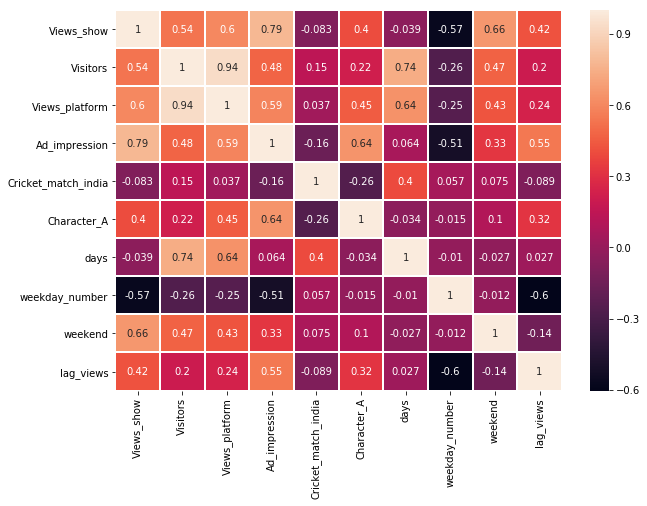

In [36]:
# plotting correlation matrix
numerical_columns = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression','Cricket_match_india', 'Character_A', 'days','weekday_number', 'weekend', 'lag_views']
corr_matrix = media_dataframe[numerical_columns].corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, linewidths = 1, linecolor = 'white')

Lag views is a parameter which is not often understood by the marketing team hence it is better to remove the paramter and build the model again.

### Creating mlr_model_5

In [37]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekend', 'Character_A']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_5 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_5 = mlr_model_5.fit()

# checking the summary statistics of the model
mlr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        21:37:58   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now again the model R-square value has dropped down to 58%, but still as per industry the model is pretty significant. Also the model is significant with all coefficients being significant and also the overall model being significant.

We also add vistors_platform as a parameter but as per business terms it cannot be considered as an important variable to be taken into consideration as views_platform cannot be forced by marketing actions rather through marketing actions visitors can be increased which in turn may yeild better views_platform.

Although the above model the p value of visitors is greater than 0.05 significance level but sometimes the significance level can be relaxed and their is no issues in that.

### Creating mlr_model_6

In [38]:
# creating X and y variables
X = media_dataframe[['Visitors', 'weekend', 'Character_A', 'Ad_impression']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_6 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_6 = mlr_model_6.fit()

# checking the summary statistics of the model
mlr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.10e-25
Time:                        21:37:59   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above statistics we can see that the R-square value and adjusted R square value has been extremely increased. Thus we can think that now th model complexity is being increased. Though R square value of the model has been increased but  p value of visiotor has become extremely insignificant and also the coefficient of character_A which use to have high relation with response now turns out to be negative coefficient with a p value of 0.1. In such when having tie between negative coefficient and high value it is always better to give precedence to remove variable with high p value.

In [39]:
#scaling the dataframe
scaler = MinMaxScaler()

# fitting on top of the scaler object
media_dataframe[numerical_columns] = scaler.fit_transform(media_dataframe[numerical_columns])

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [40]:
# checking the dataframe after scaling
media_dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekday_number,weekend,lag_views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0.0,0.0,0.000000,Wednesday,0.500000,0.0,0.000000
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0.0,0.0,0.012658,Thursday,0.666667,0.0,0.242197
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0.0,0.0,0.025316,Friday,0.833333,0.0,0.255411
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1.0,0.0,0.037975,Saturday,1.000000,1.0,0.277446
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0.0,0.0,0.050633,Sunday,0.000000,1.0,0.316440


In [41]:
# creating numerical dataframe
media_dataframe_num = media_dataframe[numerical_columns]
media_dataframe_num.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday_number,weekend,lag_views
0,0.123787,0.010985,0.011466,0.035372,0.0,0.0,0.000000,0.500000,0.0,0.000000
1,0.139066,0.020409,0.000000,0.014844,0.0,0.0,0.012658,0.666667,0.0,0.242197
2,0.164544,0.000000,0.025792,0.000000,0.0,0.0,0.025316,0.833333,0.0,0.255411
3,0.209631,0.223199,0.119842,0.048345,1.0,0.0,0.037975,1.000000,1.0,0.277446
4,0.523988,0.316041,0.255290,0.245426,0.0,0.0,0.050633,0.000000,1.0,0.316440


In [42]:
# lets check for the multicolineaity issue
vif = pd.DataFrame()

# adding features as column to vif dataframe
vif['features'] = numerical_columns

# adding vif_score as column
vif['VIF_score'] = [variance_inflation_factor(media_dataframe_num.values,i) for i in range(media_dataframe_num.shape[1])]

# sorting the dataframe based on vif score
vif.sort_values(by = 'VIF_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,VIF_score
1,Visitors,116.288138
2,Views_platform,89.241394
6,days,37.259218
0,Views_show,24.415355
3,Ad_impression,15.910265
9,lag_views,8.499194
8,weekend,7.613441
5,Character_A,5.697450
7,weekday_number,3.257749
4,Cricket_match_india,1.841784


removing visitors from the model as it as high VIF and high p value.

### Creating mlr_model_7

In [43]:
# creating X and y variables
X = media_dataframe[['weekend', 'Character_A', 'Ad_impression']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_7 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_7 = mlr_model_7.fit()

# checking the summary statistics of the model
mlr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.05e-26
Time:                        21:37:59   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.021     -0.015      0.988      -0.043       0.042
weekend           0.2302      0.029      8.019      0.000       0.173       0.287
Character_A      -0.0456      0.033     -1.394      0.167      -0.111       0.020
Ad_impression     0.7851      0.080      9.875      0.000       0.627       0.943
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                         8.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating mlr_model_8

In [44]:
# creating X and y variables
X = media_dataframe[['weekend', 'Character_A', 'Ad_impression', 'Cricket_match_india']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_8 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_8 = mlr_model_8.fit()

# checking the summary statistics of the model
mlr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.02e-25
Time:                        21:37:59   Log-Likelihood:                 67.508
No. Observations:                  80   AIC:                            -125.0
Df Residuals:                      75   BIC:                            -113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0030      0.022      0.133      0.894      -0.042       0.048
weekend                 0.2318      0.029      7.987      0.000       0.174       0.290
Character_A            -0.0487      0.033     -1.457      0.149      -0.115       0.018
Ad_impression           0.7837      0.080      9.802      0.000       0.624       0.943
Cricket_match_india    -0.0213      0.042     -0.510      0.612      -0.104       0.062
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above statistics we can see that when added cricket match inida, there is no much change in R square and adjusted R square value. But the coefficient of cricket_match_india is negative but it is naturally true that when there is cricket match the number of viewers might reduce on that particular day of match. But at the same time the p value of cricket match india tends to be very high and thus making it insiginificant. Hence the cricket_match_india variable needs to dropped. This can be understood as the people who are watching the show might not be much cricket lovers, hence though there is a match it will not affect the viewrship. Thus it can be removed.

Also the character_A coefficient is also insignificant so it can be also removed though it is an counter to business stratergy but it can be understood as people who watch this show are not just watching because of presence or absence of character they just watching as the story is good.

### Creating mlr_model_9

In [45]:
# creating X and y variables
X = media_dataframe[['weekend','Ad_impression']]
y = media_dataframe['Views_show']

# adding constant to the X
X_sm = sm.add_constant(X)

# creating the model
mlr_model_9 = sm.OLS(y,X_sm)

# fitting on to the model object
mlr_model_9 = mlr_model_9.fit()

# checking the summary statistics of the model
mlr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.95e-27
Time:                        21:37:59   Log-Likelihood:                 66.359
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      77   BIC:                            -119.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.021      0.136      0.892      -0.040       0.045
weekend           0.2364      0.029      8.282      0.000       0.180       0.293
Ad_impression     0.7130      0.061     11.736      0.000       0.592       0.834
==============================================================================
Omnibus:                        4.941   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.423
Skew:                           0.399   Prob(JB):                        0.110
Kurtosis:                       3.831   Cond. No.                         5.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus now the model is significant in terms of coefficients and also in terms p value of F statistics. Let's further confrim checking whether the features have any multicolinearity issue or not.

In [46]:
new_dataframe = media_dataframe_num[['weekend','Ad_impression']]
new_dataframe.head()

,weekend,Ad_impression
0,0.0,0.035372
1,0.0,0.014844
2,0.0,0.000000
3,1.0,0.048345
4,1.0,0.245426


In [47]:
# checking vif scores for the above

vif = pd.DataFrame()

# adding features to the dataframe
vif['features'] = ['weekend','Ad_impression']

# adding vif_score to the dataframe
vif['vif_score'] = [variance_inflation_factor(new_dataframe.values,i) for i in range(new_dataframe.shape[1])]
#sorting the dataframe based on vif score
vif.sort_values(by = 'vif_score', ascending = False, inplace = True)

# reading the dataframe
vif

,features,vif_score
0,weekend,1.537343
1,Ad_impression,1.537343


Hence from above it is clear that the vif score are also low which means that the variables have no multivolinearity issue. Hece the above model_9 can be considered as optimum model. Let's further check for residual analysis and evalvation of the model on test data.

### Residual analysis

- since the data is very small hence we didn't split the data into train and test.
- When the data is sufficiently large then we can have luxry to split into train and test.
- In case of small size data we can test the model on the same data on which we have used to built the model.
- Compute the predictions and then compare with the original values.
- Otherwise we can use method called bootstrap method, which is generally used in case of small size model prediction power check.
- In bootstrap we create in model data of 80% of the data and remaining 20% data will be considered as out model data. We create such sample datasets for about some iterations say 500 by crearting, mixing, shuffling, selecting the data parts.
- For each of the in dataset the model is built and checked on test dataset. This process is called as bootstrap.

In [48]:
# making predictions
y_pred = mlr_model_9.predict(X_sm)

In [49]:
# checking the predictions series
y_pred.head()

0    0.028127
1    0.013490
2    0.002906
3    0.273742
4    0.414263
dtype: float64

In [50]:
# checking the y_true
y.head()

0    0.123787
1    0.139066
2    0.164544
3    0.209631
4    0.523988
Name: Views_show, dtype: float64

In [51]:
# computing residuals
res = y - y_pred

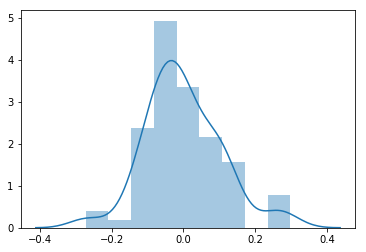

In [52]:
# checking whether the error terms are normally distributed or not
sns.distplot(res)

From the above plot we can see that the error terms are normally distributed with mean 0.

In [53]:
# analyzing the dataframe again
media_dataframe_num.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday_number,weekend,lag_views
0,0.123787,0.010985,0.011466,0.035372,0.0,0.0,0.000000,0.500000,0.0,0.000000
1,0.139066,0.020409,0.000000,0.014844,0.0,0.0,0.012658,0.666667,0.0,0.242197
2,0.164544,0.000000,0.025792,0.000000,0.0,0.0,0.025316,0.833333,0.0,0.255411
3,0.209631,0.223199,0.119842,0.048345,1.0,0.0,0.037975,1.000000,1.0,0.277446
4,0.523988,0.316041,0.255290,0.245426,0.0,0.0,0.050633,0.000000,1.0,0.316440


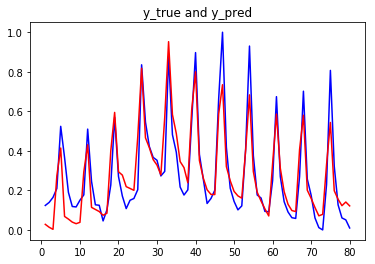

In [54]:
# plotting the values of y_true and y_pred
c = [ i for i in range(1,81)]
plt.figure()
plt.plot(c, y, color = 'blue')
plt.plot(c,y_pred, color = 'red')
plt.title('y_true and y_pred')
plt.show()

From the above plot we can see that the y_true and y_pred values are very closely overlapped with each other. It indicates that y_pred values are almost close to y_true values, thereby we can say that model had performed well in predictions. Hence it can concluded as final model to be taken into consideration. Before finally concluding we be also be sure by checking whether there exists any random error or white noise. If there exists any random error or white noise it indicates that there is no further need of addition of variables needed for building the model. If there exists any non-random error it is an indication that there exists some pattern in error terms which in turn mean that there are some unexplained terms captured by error terms which can be added in model building in order to explain such patterns on doing so there will be only random error left in error terms.

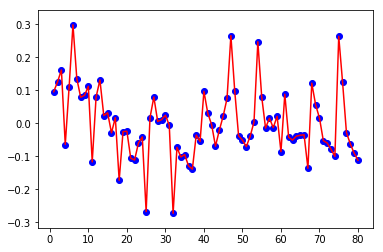

In [55]:
# checking for the random error or white noise
c = [i for i in range(1,81)]
plt.figure()
plt.scatter(c, res, color = 'blue')
plt.plot(c, res, color = 'red')
plt.show()

from the above plot we can see that there doesn't exists any visible pattern in error terms. which means that there is presence of white noise in error terms.

The conclusions need not be neccessary to be said from one single model. We can also take use of other variables used in building other models which can be helpful as per business requirement.

Hence the driver variables are:
- Ad_impression
- Weekend : though it cannot be much of an marketing team driver variable but can be taken into consideration.
- Character_A

In [60]:
# again import the data as the values of the original dataframe have been scaled
media_dataframe_new = pd.read_csv(r'mediacompany.csv')
media_dataframe_new.head()
media_dataframe_new.drop('Unnamed: 7', axis = 1, inplace = True)

In [61]:
media_dataframe_new.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [69]:
# creating weekday
import datetime
def weekday_name(x):
    x_list = x.split('/')
    month = int(x_list[0])
    day = int(x_list[1])
    year = int(x_list[2])
    value = datetime.date(year, month, day)
    final_value = value.strftime('%A')
    return final_value

In [70]:
media_dataframe_new['weekday'] = media_dataframe_new['Date'].apply(lambda x: weekday_name(x))

In [73]:
media_dataframe_new['weekday_number'] = media_dataframe_new['weekday'].apply(lambda x: weekday_num(x))

In [74]:
# checking the dataframe again
media_dataframe_new.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekday_number
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,Wednesday,4
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,Thursday,5
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,Friday,6
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,Saturday,7
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,Sunday,1
